# Sales Analysis

#### Import necessary libraries and set the working directory

In [32]:
import pandas as pd

import os

import glob

import matplotlib.pyplot as plt

import calendar

from itertools import combinations

from collections import Counter

os.chdir('/content/drive/MyDrive/Colab Notebooks/SalesAnalysis/Sales_Data')

#### Use glob to match the pattern 'csv'

In [2]:
extension = 'csv'

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#### Combine all files in the list and export as CSV

In [4]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

all_months_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/SalesAnalysis/Sales_Data/combined_csv.csv')

#### Read in updated dataframe

In [5]:
all_months_data

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Clean up the data!

##### Drop rows of NAN

In [6]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]

nan_df.head()

all_months_data = all_months_data.dropna(how = 'all')

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


##### Find 'Or' and delete it

In [7]:
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2]!= 'Or']

all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Feature engineering - augment data with additional columns

##### Add Month Column

In [8]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]

all_months_data['Month'] = all_months_data['Month'].astype('int32')

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


##### Convert columns to the correct type

```
# This is formatted as code
```



In [9]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered']) # Make int

all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])# Make float

#### Add a sales colum

In [12]:
all_months_data['Sales'] = all_months_data['Quantity Ordered']* all_months_data['Price Each']

all_months_data.insert(4, 'Sales', all_months_data.pop('Sales'))

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX)


##### Add a city column

In [10]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX)


##### Convert Order Date to datetime()

In [21]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

##### Create new hour and minute columns

In [24]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour

all_months_data['Minute'] = all_months_data['Order Date'].dt.minute

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11,59


## Questions:

### Question 1: What was the best month for sales? How much was earned that month?

In [13]:
results = all_months_data.groupby('Month').sum()

results

<ipython-input-13-cdcacb43f959>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_months_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


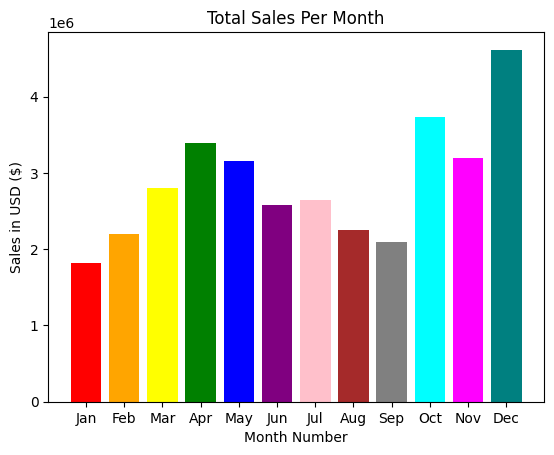

In [14]:
months = range(1,13)

# Define a list of colors for each bar

bar_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'teal']

# Plotting the bar chart

plt.bar(months, results['Sales'],color=bar_colors,tick_label=[calendar.month_abbr[i] for i in range(1, 13)])

# Adding labels and title

plt.xlabel('Month Number')

plt.ylabel('Sales in USD ($)')

plt.title('Total Sales Per Month')

# Display the chart

plt.show()

### Question 2: What city sold the most product?[link text](https://)

In [15]:
results = all_months_data.groupby('City').sum()

results

<ipython-input-15-d387836c8133>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_months_data.groupby('City').sum()


,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


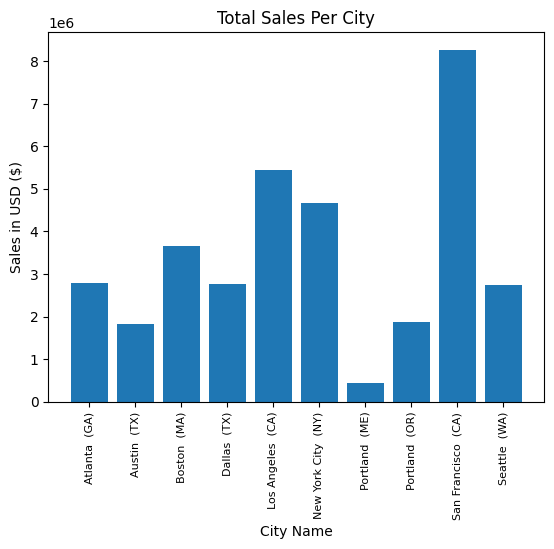

In [19]:
cities = [city for city, df in all_months_data.groupby('City')]

# Define a list of colors for each bar

# Plotting the bar chart

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation = 'vertical', size = 8)

# Adding labels and title

plt.xlabel('City Name')

plt.ylabel('Sales in USD ($)')

plt.title('Total Sales Per City')

# Display the chart

plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

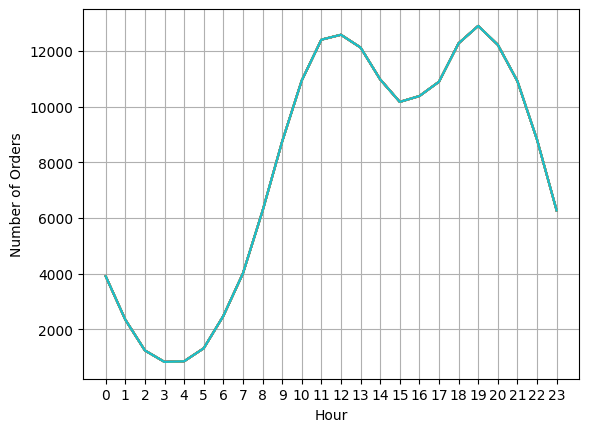

In [28]:
hours = [hour for hour, df in all_months_data.groupby('Hour')]

plt.plot(hours, all_months_data.groupby(['Hour']).count())

plt.xticks(hours)

plt.xlabel('Hour')

plt.ylabel('Number of Orders')

plt.grid()

plt.show()

#### Question 4: What products are most often sold together?


In [31]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-31-5e8f244de055>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [34]:
count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What products sold the most?

<ipython-input-41-c107d8ae9b97>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


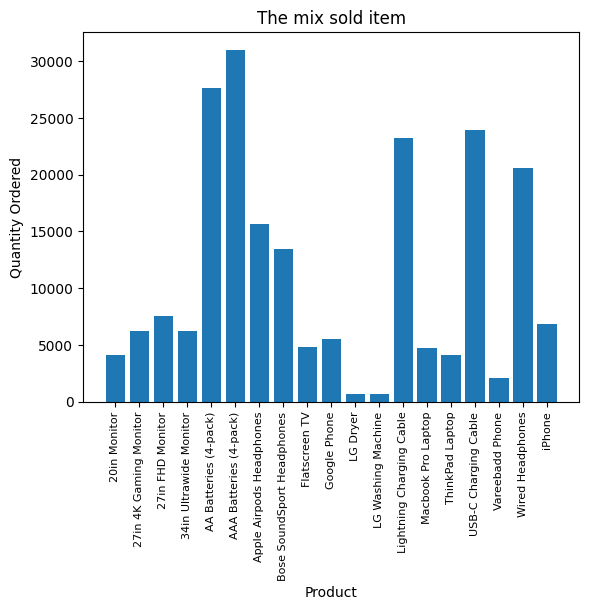

In [41]:
product_group = all_months_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.title("The mix sold item")

plt.xlabel('Product')

plt.ylabel('Quantity Ordered')

plt.xticks(products, rotation = 'vertical', size = 8)

plt.show()

<ipython-input-40-7e6c161ba9f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_months_data.groupby('Product').mean()['Price Each']
<ipython-input-40-7e6c161ba9f2>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


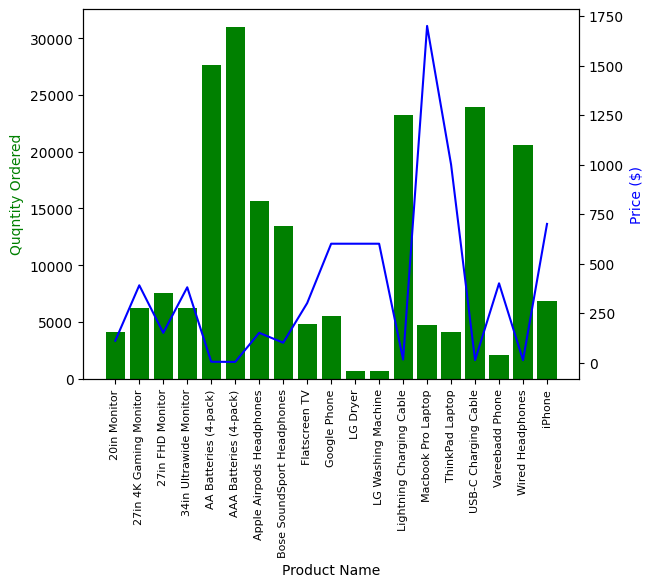

In [40]:
prices = all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color = 'green')

ax2.plot(products, prices, '-b')

ax1.set_xlabel('Product Name')

ax1.set_ylabel('Quqntity Ordered', color = 'g')

ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()